# Imports

In [97]:
from sklearn import datasets as ds
from sklearn import cluster as ct
import matplotlib.pyplot as plt
import sklearn.metrics as mt
import numpy as np
import pandas as pd

# Loading

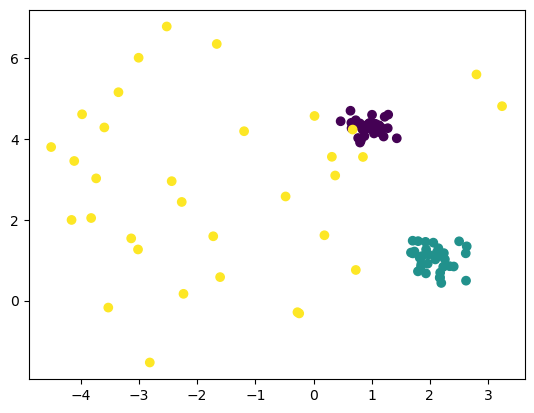

In [91]:
X, y = ds.make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=[0.2, 0.3, 2],
    random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y)

# Training

For n_clusters = 3. The average silhouette_score is 0.6725451430416917


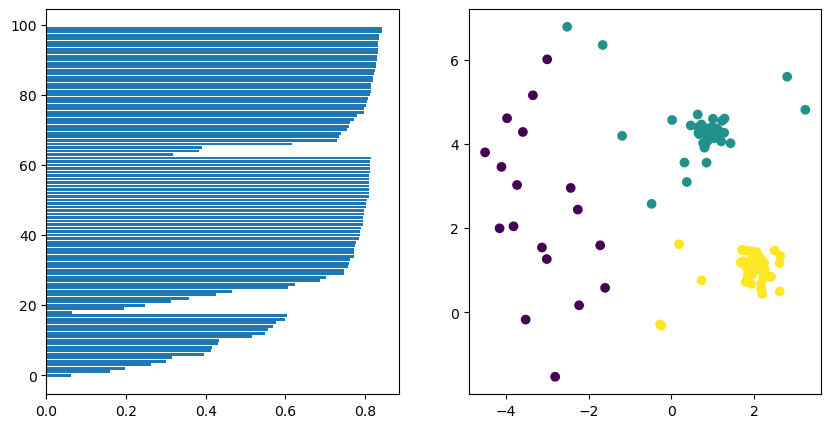

In [111]:
clusters = 3

kmeans = ct.KMeans(n_clusters=clusters, 
                   init='random',
                   n_init=10,
                   random_state=0
                   )

labels = kmeans.fit_predict(X)

silhouette_avg = mt.silhouette_score(X, labels)

df_sil = pd.DataFrame({'sil': mt.silhouette_samples(X, labels),
                       'lab': labels})
df_sil = df_sil.sort_values(['lab', 'sil']).reset_index()

print(f'For n_clusters = {clusters}. The average silhouette_score is {silhouette_avg}')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.barh(df_sil.index, df_sil['sil'])
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_);

# Fine Tunning

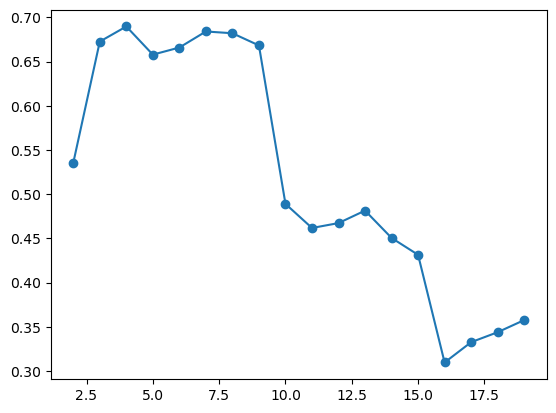

In [92]:
clusters = np.arange(2, 20, 1)
silhouettes = []

for cluster in clusters:
    kmeans = ct.KMeans(n_clusters=cluster, 
                       init='random',
                       n_init=10,
                       random_state=0)

    labels = kmeans.fit_predict(X)

    silhouette_avg = mt.silhouette_score(X, labels)    
    silhouettes.append([cluster, silhouette_avg])

silhouettes = np.array(silhouettes)
plt.plot(silhouettes[:, 0], silhouettes[:, 1], '-o')